In [34]:
%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-install-fi90tzq6/qc-grader_f445ef5104dc4e4b8b5781d0fcf5587d
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-install-fi90tzq6/qc-grader_f445ef5104dc4e4b8b5781d0fcf5587d
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 897f4448b14d18b4d0a430f57f11c2dcb6200c20
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [4]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.0.3
Grader version: 0.22.9


In [5]:
# Check that the account has been saved properly
from qiskit_ibm_runtime import QiskitRuntimeService


service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'ejUCoSpcBEbkmqm6H4QSdbK6jL1Cs19gYfHRjji7eHaZ',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/d9f30ca59fa549a4b1e8e36b44d1aff9:c023f92e-1cd9-4c71-830b-1ace2cb98a4e::',
  'verify': True,
  'private_endpoint': False}}

In [6]:

# Essential libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import (
    grade_lab1_ex1_1, 
    grade_lab1_ex1_2, 
    grade_lab1_ex1_3, 
    grade_lab1_ex1_4, 
    grade_lab1_ex2, 
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6 
)

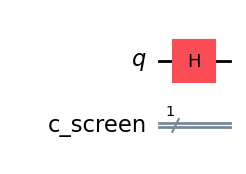

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Define 1-qubit quantum and classical registers with helpful names
qr = QuantumRegister(1, name='q')          
cr = ClassicalRegister(1, name='c_screen') 

# Create the quantum circuit
double_slit = QuantumCircuit(qr, cr)

# Apply Hadamard to simulate superposition (passing through both slits)
double_slit.h(qr[0])

# Draw the circuit
double_slit.draw('mpl')



In [8]:
# Submit your answer using the following code
grade_lab1_ex1_1(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


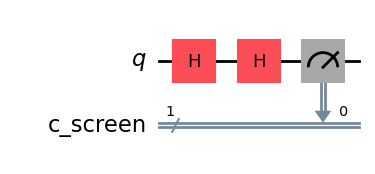

In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Create registers
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

# Create the quantum circuit
double_slit = QuantumCircuit(qr, cr)

# your code here

# Step 1: Apply Hadamard to simulate superposition (passing through both slits)
double_slit.h(qr[0])

# Step 2: Apply Hadamard again to simulate interference at center of screen (no phase difference)
double_slit.h(qr[0])

# Step 3: Measure the qubit onto the classical screen
double_slit.measure(qr[0], cr[0])

# Draw the circuit
double_slit.draw('mpl')


In [10]:
grade_lab1_ex1_2(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


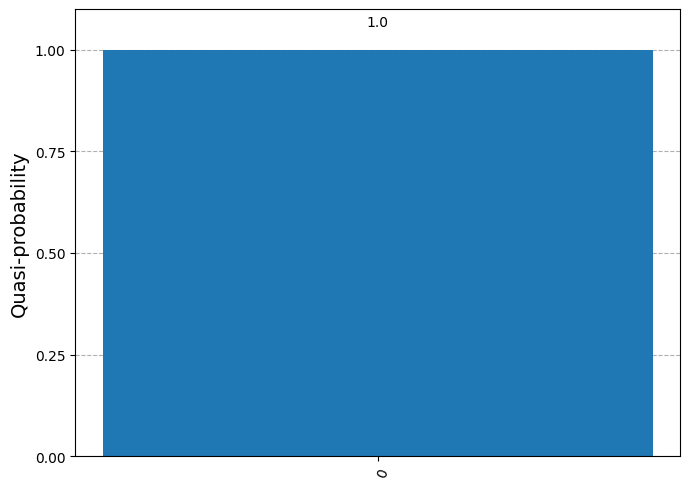

In [11]:

# use simulator
backend = AerSimulator()

# make quantum circuit compatible to the backend
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)
qc_isa = pm.run(double_slit)

# run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots = 1000).result()[0].data.c_screen.get_counts()

plot_distribution(counts)

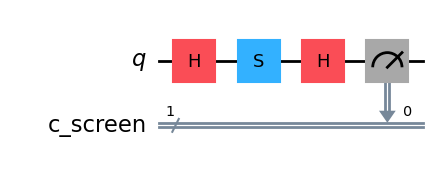

In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_with_difference = QuantumCircuit(qr, cr)

# Superposition: particle passes through both slits
double_slit_with_difference.h(qr[0])

# Introduce a phase shift to |1⟩ component only
double_slit_with_difference.s(qr[0])  # or use .p(3.1415, qr[0])

# Interference at screen center
double_slit_with_difference.h(qr[0])

# Measurement onto classical register
double_slit_with_difference.measure(qr[0], cr[0])

# Draw the circuit
double_slit_with_difference.draw('mpl')


In [13]:

# Submit your answer using the following code
grade_lab1_ex1_3(double_slit_with_difference)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


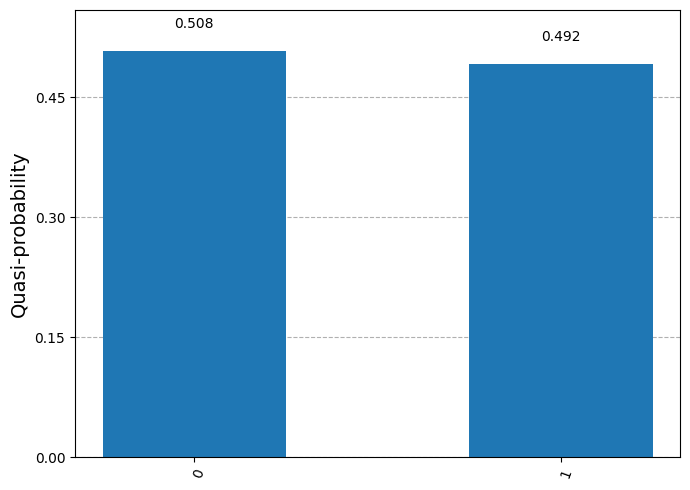

In [14]:
qc_isa = pm.run(double_slit_with_difference)

#run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots=10000).result()[0].data.c_screen.get_counts()
plot_distribution(counts)

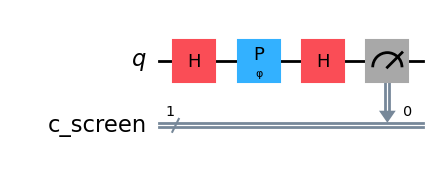

In [15]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

φ = Parameter('φ')

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_fringe = QuantumCircuit(qr, cr)

# your code here

double_slit_fringe.h(qr[0])       # Create superposition (double slit)
double_slit_fringe.p(φ, qr[0])    # Apply parameterized phase shift
double_slit_fringe.h(qr[0])       # Interference at the screen
double_slit_fringe.measure(qr[0], cr[0])  # Measure the qubit

# end of your code

double_slit_fringe.draw('mpl')


In [16]:

# Submit your answer using the following code
grade_lab1_ex1_4(double_slit_fringe)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


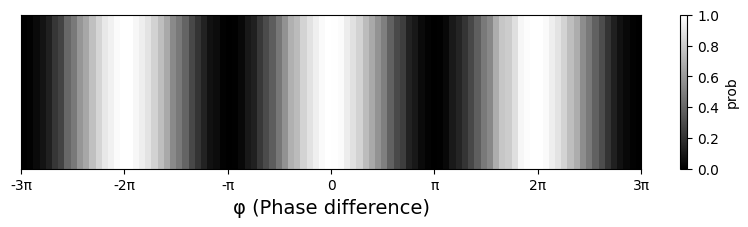

In [17]:
φ_lst = np.linspace(-3*np.pi, 3*np.pi, 100)
qc_isa = pm.run(double_slit_fringe)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

#plot heat map
φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1])

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

In [18]:
import numpy as np
from qiskit import QuantumCircuit

def create_chsh_circuit(x, y):
    """Builds Qiskit circuit for Alice & Bob's quantum strategy in CHSH game."""
    qc = QuantumCircuit(2, 2, name=f'CHSH_{x}{y}')  # 2 qubits, 2 classical bits

    # --- Task 1: Create Bell State |Φ+> = (|00> + |11>)/√2 ---
    qc.h(0)         # Hadamard on Alice's qubit
    qc.cx(0, 1)     # CNOT to entangle with Bob's qubit

    qc.barrier()

    # --- Step 2a: Alice's measurement basis ---
    if x == 1:
        qc.h(0)  # H transforms Z to X-basis (for x=1)

    # --- Task 2: Bob's measurement basis ---
    if y == 0:
        qc.ry(-np.pi/4, 1)  # Rotate for y = 0
    else:
        qc.ry(np.pi/4, 1)   # Rotate for y = 1

    qc.barrier()

    # --- Step 3: Measurement ---
    qc.measure([0, 1], [0, 1])  # Measure Alice's to c0, Bob's to c1

    return qc


In [19]:

# Submit your answer using the following code
grade_lab1_ex4(create_chsh_circuit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):


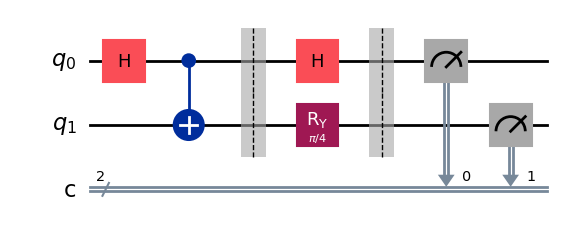

In [20]:
circuits = []
input_pairs = []
for x_in in [0, 1]:
    for y_in in [0, 1]:
        input_pairs.append((x_in, y_in))
        circuits.append(create_chsh_circuit(x_in, y_in))

print("Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):")
if len(circuits) == 4:
    display(circuits[3].draw('mpl')) # (x,y) = (1,1)
else:
    print("Circuits not generated. Run previous cell after completing Exercises 1 & 2.")

Preparing circuits for the simulator...

--- Simulation Results (Counts) ---
Inputs (x=0, y=0):
  Outcomes (ba): {'00': 454, '01': 68, '10': 77, '11': 425}
Inputs (x=0, y=1):
  Outcomes (ba): {'00': 432, '01': 89, '10': 70, '11': 433}
Inputs (x=1, y=0):
  Outcomes (ba): {'00': 461, '01': 66, '10': 72, '11': 425}
Inputs (x=1, y=1):
  Outcomes (ba): {'00': 74, '01': 447, '10': 409, '11': 94}

Plotting results...


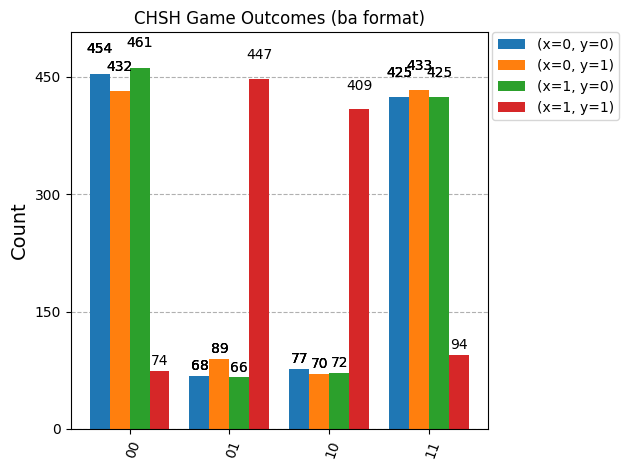

In [21]:
# AerSimulator (if not already defined)
# backend = AerSimulator()
# Pass manager (if not already defined)
# pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

SHOTS = 1024

print("Preparing circuits for the simulator...")
isa_qc_chsh = pm.run(circuits)

sampler_chsh = Sampler(mode=backend) # SamplerV2
job_chsh = sampler_chsh.run(isa_qc_chsh, shots=SHOTS)
results_chsh = job_chsh.result()

# SamplerV2: results_chsh[i].data.c.get_counts() where 'c' is the default name of classical register
counts_list = [results_chsh[i].data.c.get_counts() for i in range(len(circuits))]

print("\n--- Simulation Results (Counts) ---")
for i, (x, y) in enumerate(input_pairs):
    print(f"Inputs (x={x}, y={y}):")
    sorted_counts = dict(sorted(counts_list[i].items()))
    print(f"  Outcomes (ba): {sorted_counts}")

print("\nPlotting results...")
display(plot_histogram(counts_list,
                       legend=[f'(x={x}, y={y})' for x, y in input_pairs],
                       title='CHSH Game Outcomes (ba format)'))

In [22]:
for i, (x, y) in enumerate(input_pairs):
    counts = counts_list[i]

    # ---- TODO : Task 1 ---
    # Target (a XOR b) value for winning
    target_xor_result = x & y
    # --- End of TODO ---

    wins_for_this_case = 0

    # ---- TODO : Task 2 ---
    # Calculate the total number of shots that satisfy the winning condition determined above.
    for outcome, count in counts.items():
        a = int(outcome[1])  # Alice's bit (stored in c0)
        b = int(outcome[0])  # Bob's bit (stored in c1)
        if a ^ b == target_xor_result:
            wins_for_this_case += count
    # --- End of TODO ---
win_probabilities = {}
print("--- Calculating Win Probabilities ---")

for i, (x, y) in enumerate(input_pairs):
    counts = counts_list[i]

    # ---- Task 1: Determine target (a XOR b) for win condition ---
    target_xor_result = x & y

    wins_for_this_case = 0

    # ---- Task 2: Count outcomes satisfying win condition ---
    for outcome, count in counts.items():
        a = int(outcome[1])  # Alice's bit (stored in c0)
        b = int(outcome[0])  # Bob's bit (stored in c1)
        if a ^ b == target_xor_result:
            wins_for_this_case += count

    prob = wins_for_this_case / SHOTS if SHOTS > 0 else 0
    win_probabilities[(x, y)] = prob
    print(f"Inputs (x={x}, y={y}): Target (a XOR b) = {target_xor_result}. Win Probability = {prob:.4f}")

avg_win_prob = sum(win_probabilities.values()) / 4.0
P_win_quantum_theory = np.cos(np.pi / 8)**2  # ~0.8536
P_win_classical_limit = 0.75

print("\n--- Overall Performance ---")
print(f"Experimental Average Win Probability: {avg_win_prob:.4f}")
print(f"Theoretical Quantum Win Probability: {P_win_quantum_theory:.4f}")
print(f"Classical Limit Win Probability:     {P_win_classical_limit:.4f}")

if avg_win_prob > P_win_classical_limit + 0.01:
    print(f"\nSuccess! Your result ({avg_win_prob:.4f}) clearly beats the classical 75% limit!")
    print(f"It's likely close to the theoretical quantum prediction of {P_win_quantum_theory:.4f}.")
elif avg_win_prob > P_win_classical_limit - 0.02:
    print(f"\nClose, but no cigar? Your result ({avg_win_prob:.4f}) is around the classical limit ({P_win_classical_limit:.4f}).")
    print("Check your solutions for Exercises 1-4 carefully, especially the win counting logic in Ex 4.")
else:
    print(f"\nHmm, the result ({avg_win_prob:.4f}) is unexpectedly low, even below the classical limit.")
    print("There might be an error in Exercises 1-4. Please review your circuit and analysis code.")



--- Calculating Win Probabilities ---
Inputs (x=0, y=0): Target (a XOR b) = 0. Win Probability = 0.8584
Inputs (x=0, y=1): Target (a XOR b) = 0. Win Probability = 0.8447
Inputs (x=1, y=0): Target (a XOR b) = 0. Win Probability = 0.8652
Inputs (x=1, y=1): Target (a XOR b) = 1. Win Probability = 0.8359

--- Overall Performance ---
Experimental Average Win Probability: 0.8511
Theoretical Quantum Win Probability: 0.8536
Classical Limit Win Probability:     0.7500

Success! Your result (0.8511) clearly beats the classical 75% limit!
It's likely close to the theoretical quantum prediction of 0.8536.


In [23]:

# Submit your answer using the following code
grade_lab1_ex5(counts_list, avg_win_prob)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


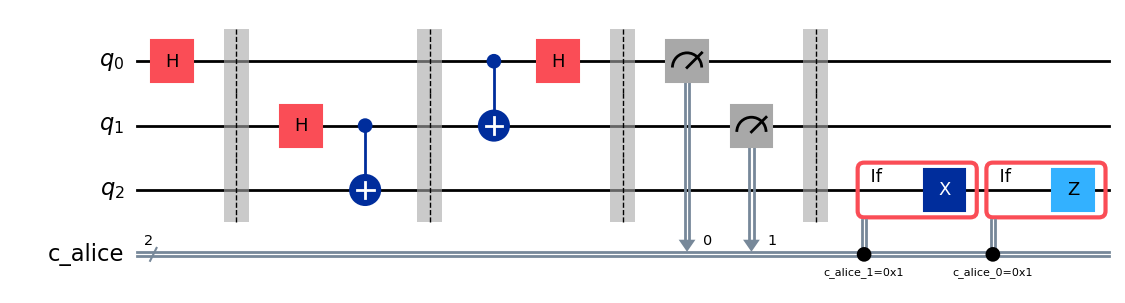

In [24]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, DensityMatrix, partial_trace
from qiskit.visualization import plot_state_city
from IPython.display import display
from qiskit.circuit.library import XGate, ZGate # Import for clarity, though not strictly needed for if_test with direct gate application

# Registers
qr = QuantumRegister(3, name='q')           # q0: Alice's message, q1: Alice entangled, q2: Bob
cr = ClassicalRegister(2, name='c_alice')   # Alice's measurement bits

# Circuit setup
teleport_qc = QuantumCircuit(qr, cr, name='Teleportation')

# Step 0: Prepare Alice's qubit |+> state to teleport
teleport_qc.h(qr[0])
teleport_qc.barrier()

# Step 1: Create Bell pair between q1 and q2 (entangled pair)
teleport_qc.h(qr[1])
teleport_qc.cx(qr[1], qr[2])
teleport_qc.barrier()

# Step 2: Alice performs Bell measurement gates
teleport_qc.cx(qr[0], qr[1])
teleport_qc.h(qr[0])
teleport_qc.barrier()

# Step 3: Measure Alice's qubits into classical bits
teleport_qc.measure(qr[0], cr[0])
teleport_qc.measure(qr[1], cr[1])
teleport_qc.barrier()

# Step 4: Bob's conditional correction gates based on Alice's measurement results

# If cr[1] (measurement from qr[1]) is 1, apply X to qr[2]
with teleport_qc.if_test((cr[1], 1)):
    teleport_qc.x(qr[2])

# If cr[0] (measurement from qr[0]) is 1, apply Z to qr[2]
with teleport_qc.if_test((cr[0], 1)):
    teleport_qc.z(qr[2])


# Display circuit
display(teleport_qc.draw('mpl'))




In [25]:
# Submit your answer using the following code
grade_lab1_ex6(teleport_qc)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Using statevector simulator...
Running statevector simulation...
Simulation successful.
Statevector retrieved successfully.

Visualizing final qubit states (q2 should match initial q0 state |+>):


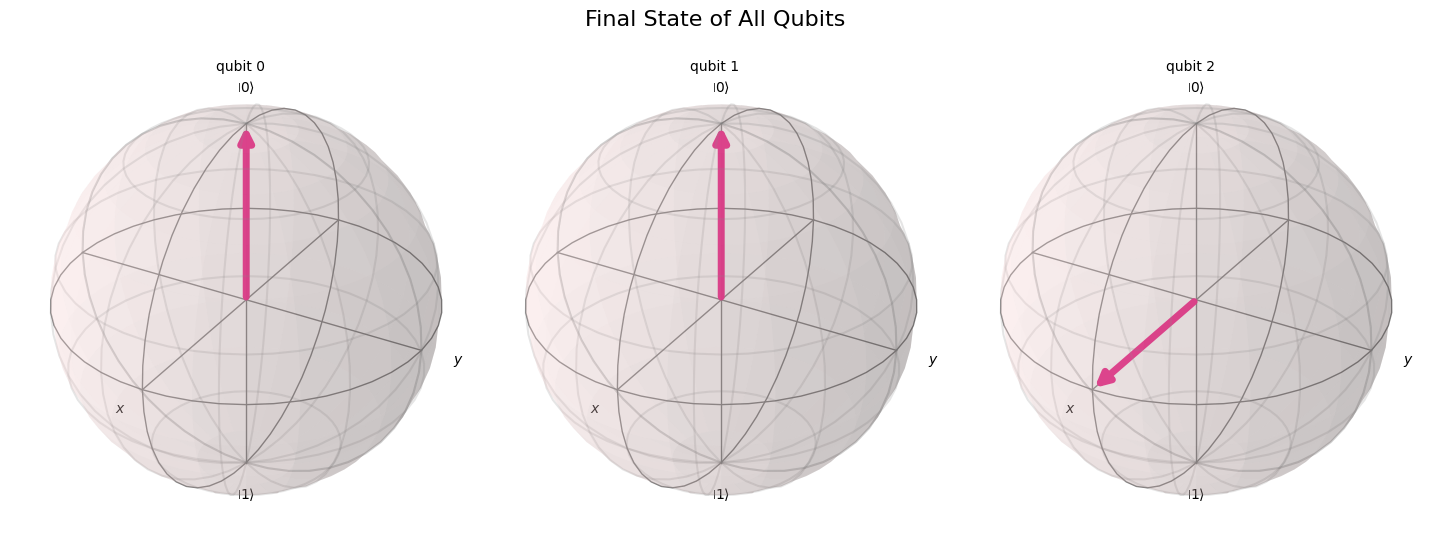

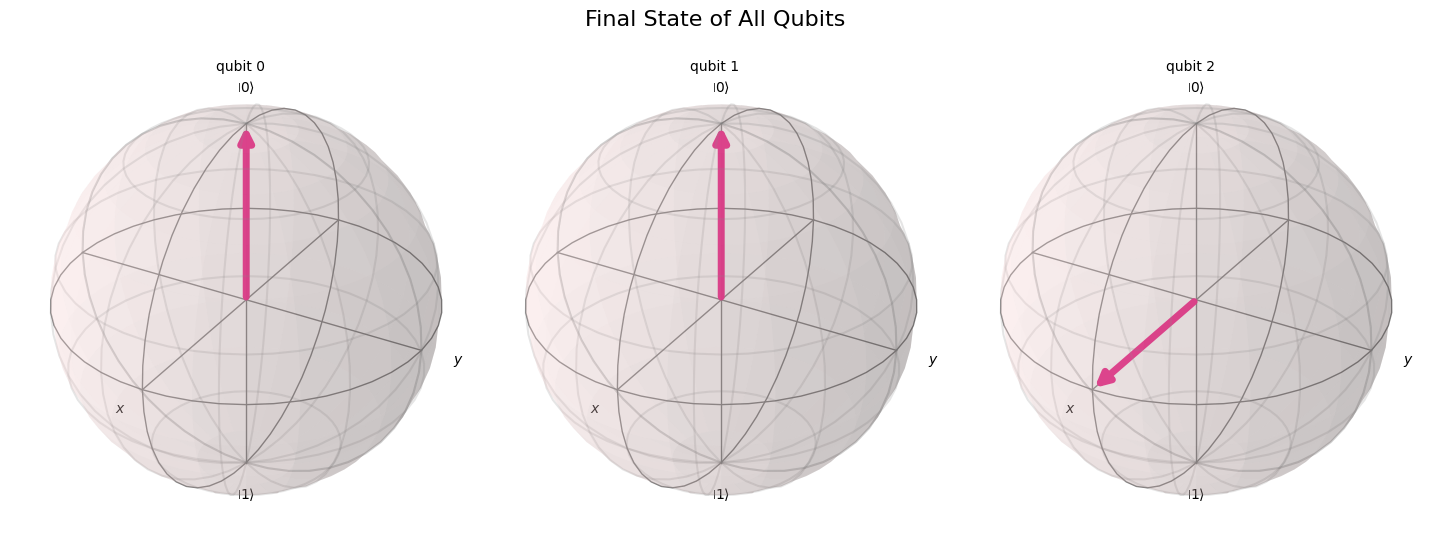

In [26]:
%matplotlib inline
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import partial_trace
from qiskit_aer import AerSimulator
from qiskit import transpile

# Use Statevector Simulator
print("Using statevector simulator...")
sv_simulator = AerSimulator(method='statevector') # Explicitly set method for clarity
teleport_qc_sv = teleport_qc.copy() # Work with a copy for statevector simulation
teleport_qc_sv.save_statevector() # Save statevector at the end
print("Running statevector simulation...")
job_sv = sv_simulator.run(teleport_qc_sv) # shots=1 is default for statevector
result_sv = job_sv.result()

if result_sv.success:
    print("Simulation successful.")
    final_statevector = result_sv.get_statevector()
    print("Statevector retrieved successfully.")
    print("\nVisualizing final qubit states (q2 should match initial q0 state |+>):")
    # q0 was |+> (points along +X). After teleportation, q2 should be |+>.
    # q0 and q1 states are after Alice's measurement, so they'll be collapsed.
    
    # Use plot_bloch_multivector to plot the final_statevector
    fig = plot_bloch_multivector(final_statevector, title="Final State of All Qubits")
    display(fig)
else:
    print(f"Statevector simulation failed! Status: {result_sv.status}")


In [35]:

#Check your submission status with the code belowf
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")


Lab 0: 2/2 exercises completed (100%)
    ✅ 1587 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 793 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab


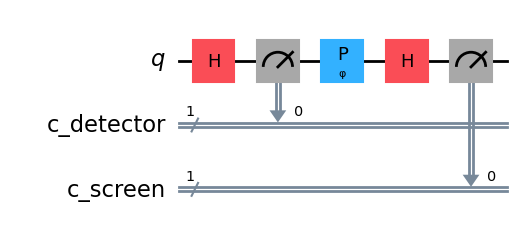

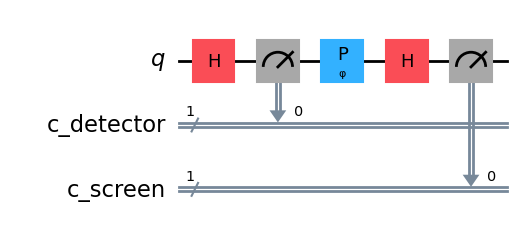

In [33]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit import Parameter
qr = QuantumRegister(1, name='q')
cr1 = ClassicalRegister(1, name='c_detector')  # which-path measurement
cr2 = ClassicalRegister(1, name='c_screen')    # final screen measurement
double_slit_with_detector = QuantumCircuit(qr, cr1, cr2)
φ = Parameter('φ')

# 1. Create superposition (both slits)
double_slit_with_detector.h(0)

# 2. Which-path detection (measurement collapses superposition)
double_slit_with_detector.measure(0, cr1)

# 3. Phase shift (apply directly after measurement)
double_slit_with_detector.p(φ, 0)
double_slit_with_detector.h(0)

# 4. Final measurement (simulate screen)
double_slit_with_detector.measure(0, cr2)

# Draw
double_slit_with_detector.draw('mpl')

In [34]:
grade_lab1_ex3(double_slit_with_detector)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.
